# Mini project 7

### Проект направлен на работу с гугл таблицами через API. В проекте представлены решение задач на загрузку и выгрузку данных, задачи посвященные EDA с небольшой визуализацией данных.

In [2]:
import json
import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from io import BytesIO
import requests
import numpy as np

%matplotlib inline

In [42]:
# Specify path to your file with credentials
path_to_credential = '.\keys\mini-project-7-1-fe6327fd8030.json' 

# Specify name of table in google sheets
# table_name = 'name of your table'

scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credential, scope)

gs = gspread.authorize(credentials)

def get_data(table_name):
        work_sheet = gs.open(table_name)

        # Select 1st sheet
        sheet1 = work_sheet.sheet1

        # Get data in python lists format
        data = sheet1.get_all_values()

        # Get header from data
        headers = data.pop(0)

        # Create df
        df = pd.DataFrame(data, columns=headers)

        df['date'] = df['date'].astype("datetime64[ns]")
        df['date'] = pd.to_datetime(df['date']). dt.date
        df['visits'] = df['visits'].astype(float)
        df['visits'] = df['visits'].astype(int)

        return df


# Task 1
### Посмотреть на распределение посещений сайта по дням. Построить график с распределением количества посещений от ботов и обычных пользователей сайта. Данные для построения графика хранятся `step_1_lesson_7`.

In [45]:
df_1 = get_data('step_1_lesson_7')
df_1.head()

,date,user_type,visits
0,2020-06-15,People,417
1,2020-06-15,Robots,177
2,2020-06-16,People,472
3,2020-06-16,Robots,91
4,2020-06-17,People,475


In [8]:
df_1.dtypes



date         object
user_type    object
visits        int32
dtype: object

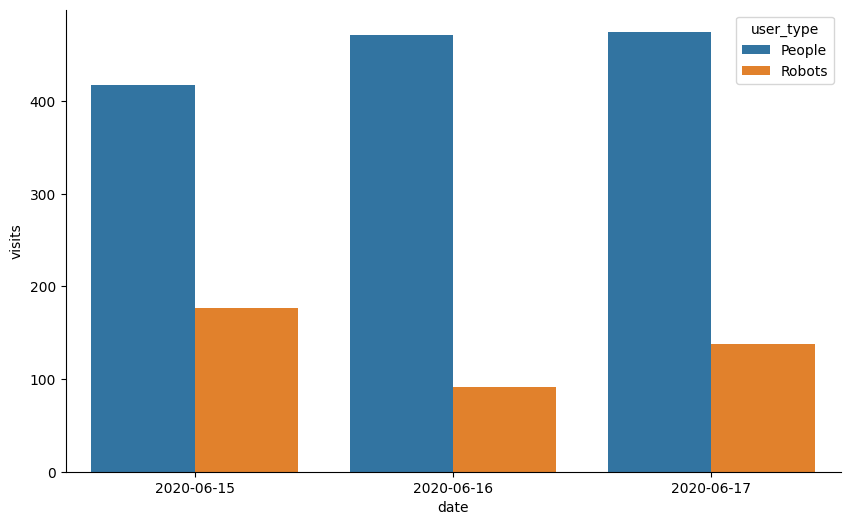

In [9]:
# график с распределением количества посещений от ботов и обычных пользователей сайта
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df_1, x='date', y='visits', hue='user_type', ax=ax)
sns.despine()


**Выводы:**

- Наименьшее число посещений пользователей-людей наблюдается 15 июня
- Наибольшая разница между числом посещений людьми и ботами наблюдается 16 июня
- 15 июня сайт посетило наибольшее число ботов
- 15 июня ботов было примерно в два раза больше, чем 16 июня

# Task 2
### Оределить процент посещений сайта  с бразузера Google Chrome. Ответ округлите до целого.

In [46]:
df_2 = get_data('step_2_lesson_7')
df_2

,date,browser,visits
0,2020-06-15,Google Chrome,354
1,2020-06-15,Firefox,58
2,2020-06-15,Yandex Browser,54
3,2020-06-15,Safari,41
4,2020-06-15,Chrome Mobile,31
5,2020-06-15,Opera,16
6,2020-06-15,Mobile Safari,16
7,2020-06-15,Samsung Internet,9
8,2020-06-15,Edge,5
9,2020-06-15,UCWEB,4


In [47]:
df_2.dtypes

date       object
browser    object
visits      int32
dtype: object

In [15]:
df_2.loc[df_2.browser == 'Google Chrome'].visits.iloc[0]

354

In [19]:
percent = np.round(df_2.loc[df_2.browser == 'Google Chrome']['visits'].iloc[0] / df_2.visits.sum() * 100, 0)
print(f'Answer: {percent}')

Answer: 60.0


# Task 3

### С какого браузера приходит больше всего ботов. Посмотрите на данные и определите, у какого браузера самая большая доля посещений сайта ботами от общего числа посещений в этом браузере? В качестве ответа укажите название браузера.

In [49]:
df_3 = get_data('step_3_lesson_7')
df_3.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250
1,2020-06-15,Google Chrome,Robots,104
2,2020-06-15,Yandex Browser,People,47
3,2020-06-15,Firefox,Robots,31
4,2020-06-15,Chrome Mobile,People,31


In [50]:
us_bot = df_3.groupby(['browser', 'user_type']).visits.sum()
us_bot

browser             user_type
Android Browser     People         1
Chrome Mobile       People        31
Chromium            People         1
                    Robots         1
CocCoc              People         1
Edge                People         4
                    Robots         1
Firefox             People        27
                    Robots        31
Google Chrome       People       250
                    Robots       104
Mobile Safari       People        15
                    Robots         1
Opera               People        11
                    Robots         5
Safari              People        19
                    Robots        22
Samsung Internet    People         8
                    Robots         1
UCWEB               Robots         4
Vivaldi             People         1
Yandex Browser      People        47
                    Robots         7
Yandex: mobile app  People         1
Name: visits, dtype: int32

In [32]:
browser = df_3.groupby(['browser']).visits.sum()
browser

browser
Android Browser         1
Chrome Mobile          31
Chromium                2
CocCoc                  1
Edge                    5
Firefox                58
Google Chrome         354
Mobile Safari          16
Opera                  16
Safari                 41
Samsung Internet        9
UCWEB                   4
Vivaldi                 1
Yandex Browser         54
Yandex: mobile app      1
Name: visits, dtype: int32

In [33]:
ratio = us_bot / browser

In [35]:
ratio.loc[:, 'Robots'].sort_values(ascending=False)

browser
UCWEB               1.000000
Safari              0.536585
Firefox             0.534483
Chromium            0.500000
Opera               0.312500
Google Chrome       0.293785
Edge                0.200000
Yandex Browser      0.129630
Samsung Internet    0.111111
Mobile Safari       0.062500
Name: visits, dtype: float64

In [36]:
ratio.loc[:, 'Robots'].idxmax()

'UCWEB'

# Task 4
Выгрузите данные (`step_4_lesson_7`), содержащие информацию о дне, типе пользователя, браузере. Создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.

В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.

Hint: обратите внимание, здесь вам нужно найти долю заходов конкретных типов пользователей с конкретного браузера от вообще всех-всех заходов на сайт за этот день.

In [52]:
df_4 = get_data('step_4_lesson_7')
df_4.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250
1,2020-06-15,Google Chrome,Robots,104
2,2020-06-15,Yandex Browser,People,47
3,2020-06-15,Firefox,Robots,31
4,2020-06-15,Chrome Mobile,People,31


In [41]:
df_4 = get_data('step_4_lesson_7')
df_4.dtypes

date         object
browser      object
user_type    object
visits        int32
dtype: object

In [53]:
df_4['all_visits'] = df_4.visits.sum()

In [54]:
df_4['percent'] = df_4['visits'] / df_4['all_visits'] * 100

In [55]:
df_4.head()

,date,browser,user_type,visits,all_visits,percent
0,2020-06-15,Google Chrome,People,250,594,42.087542
1,2020-06-15,Google Chrome,Robots,104,594,17.508418
2,2020-06-15,Yandex Browser,People,47,594,7.912458
3,2020-06-15,Firefox,Robots,31,594,5.218855
4,2020-06-15,Chrome Mobile,People,31,594,5.218855


In [57]:
# фильтруем данные  и округляем 
round(df_4.query("user_type == 'People' & browser == 'Safari'")['percent'], 1)


7    3.2
Name: percent, dtype: float64